## Problem Statement No. 15
Consider the Amazon Alexa Reviews Dataset. This dataset consists of a nearly 3000 Amazon customer reviews (input
text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots,
Alexa Firesticks etc. Perform following operations on this dataset.
1) Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)
2) Convert the review text into lowercase.
3) Remove all punctuations from review text.
4) Remove emoticons and emojis from the text
5) Tokenize the review text into words.
6) Remove the Stopwords from the tokenized text.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns 
import nltk
import string
import re

In [47]:
df=pd.read_csv(r"D:\OneDrive\Desktop\Desktop\New folder\Datasets\Alexa-Dataset.csv")
df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [48]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [49]:
df.dropna(inplace=True)

<Axes: xlabel='feedback', ylabel='count'>

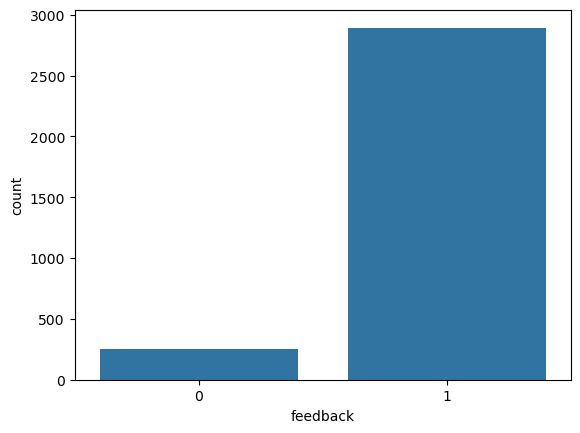

In [50]:
sns.countplot(data=df,x="feedback")

In [51]:
df["Lower_reviews"]=df["verified_reviews"].str.lower()
df.head()

,rating,date,variation,verified_reviews,feedback,Lower_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [52]:
def remove_pun(s):
    res=""
    if isinstance(s,str):
        for i in s:
            if i not in string.punctuation:
                res+=i
        return res
df["punctuation_free"]=df["Lower_reviews"].apply(remove_pun)
df.head()

,rating,date,variation,verified_reviews,feedback,Lower_reviews,punctuation_free
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music


In [54]:
def emojifree(s):
    if isinstance(s,str):
        emoji=re.compile(
        "["u"\U0001F600-\U0001F64F]+"
        ,flags=re.UNICODE)
        return emoji.sub(r'',s)
    else:
        return ""
df["Emoji_free"]=df["punctuation_free"].apply(emojifree)
df.head(62)

,rating,date,variation,verified_reviews,feedback,Lower_reviews,punctuation_free,Emoji_free
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music
...,...,...,...,...,...,...,...,...
57,4,30-Jul-18,Charcoal Fabric,Great sound and easy to set up.,1,great sound and easy to set up.,great sound and easy to set up,great sound and easy to set up
58,5,30-Jul-18,Oak Finish,"Love Alexa, bought others for friends",1,"love alexa, bought others for friends",love alexa bought others for friends,love alexa bought others for friends
59,5,30-Jul-18,Charcoal Fabric,Love the echo I purchased it for company for m...,1,love the echo i purchased it for company for m...,love the echo i purchased it for company for m...,love the echo i purchased it for company for m...
60,5,30-Jul-18,Heather Gray Fabric,😍,1,😍,😍,


In [56]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['tokens']=df['Emoji_free'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,rating,date,variation,verified_reviews,feedback,Lower_reviews,punctuation_free,Emoji_free,tokens
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,"[love, my, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,"[loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,"[sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,[music]


In [63]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
df["stopwords"]=df['tokens'].apply(lambda x : [word for word in x if word not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,date,variation,verified_reviews,feedback,Lower_reviews,punctuation_free,Emoji_free,tokens,stopwords
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,"[love, my, echo]","[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,"[loved, it]",[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,"[sometimes, while, playing, a, game, you, can,...","[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,"[i, have, had, a, lot, of, fun, with, this, th...","[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,[music],[music]
